In [58]:
# Homework 6 Template
# G. Besla & R. Li

In [96]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G
import sys
# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass import CenterOfMass



In [97]:
def OrbitCOM(galaxy,start,end,n):  
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
          
    outputs: 
    """
    
    # compose the filename for output
    fileout = f"Orbit_{galaxy}.txt"
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    delta = .1
    volDec = 2
    if galaxy == "M33":
        volDec = 4.0
    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    snap_ids = np.arange(start,end,n)
    
    # Check if the array is empty
    if snap_ids.size == 0:
        print("Array is empty, stopping code.")
        sys.exit()
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([len(snap_ids),7])
    
    # a for loop 
    for i, snap_id in enumerate(snap_ids):
        # compose the data filename (be careful about the folder)
        ilbl = '000' + str(snap_id) 
        ilbl = ilbl[-3:]  
        filename = (galaxy) + "/" + "%s_"%(galaxy) + ilbl + ".txt"
        # Initialize an instance of CenterOfMass class, using disk particles
        COM_instance = CenterOfMass(filename, 2)
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COM_pos = COM_instance.COM_P(delta,volDec)
        COM_vel = COM_instance.COM_V(COM_pos[0],COM_pos[1],COM_pos[2])
        COM_time = COM_instance.time
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        orbit[i] = (COM_time.value/1000, *tuple(COM_pos.value), *tuple(COM_vel.value))
        
        # print snap_id to see the progress
        print(snap_id)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [98]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
OrbitCOM("MW",0,801,5)
OrbitCOM("M31",0,801,5)
OrbitCOM("M33",0,801,5)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495


In [99]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
MW = np.genfromtxt("Orbit_MW.txt")
M31 = np.genfromtxt("Orbit_M31.txt")
M33 = np.genfromtxt("Orbit_M33.txt")

In [100]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def diff_mag(vector1,vector2):
    mag = np.zeros([len(vector1),2])
    for i in range(len(vector1)):
        x = vector1[i][1] - vector2[i][1]
        y = vector1[i][2] - vector2[i][2]
        z = vector1[i][3] - vector2[i][3]
        vx = vector1[i][4] - vector2[i][4]
        vy = vector1[i][5] - vector2[i][5]
        vz = vector1[i][6] - vector2[i][6]
        mag[i][0] = np.sqrt(x**2 + y**2 + z**2)
        mag[i][1] = np.sqrt(vx**2 + vy**2 + vz**2)
    return mag

In [101]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
diff_MW_M31 = diff_mag(MW,M31)
# of M33 and M31
diff_M31_M33 = diff_mag(M31,M33)

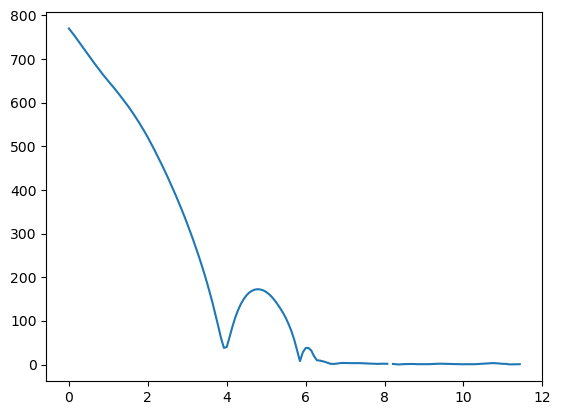

In [102]:
# Plot the Orbit of the galaxies 
#################################
plt.plot(MW[:,0],diff_MW_M31[:,0])


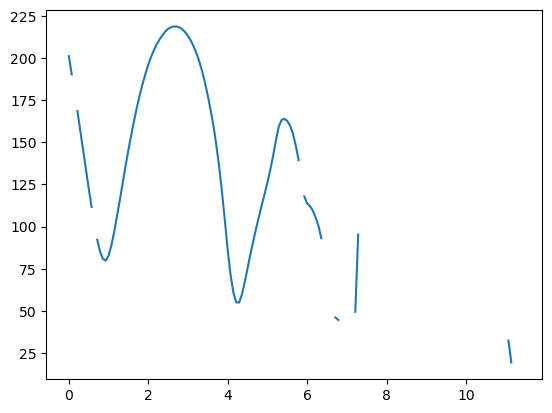

In [103]:
plt.plot(M33[:,0],diff_M31_M33[:,0])

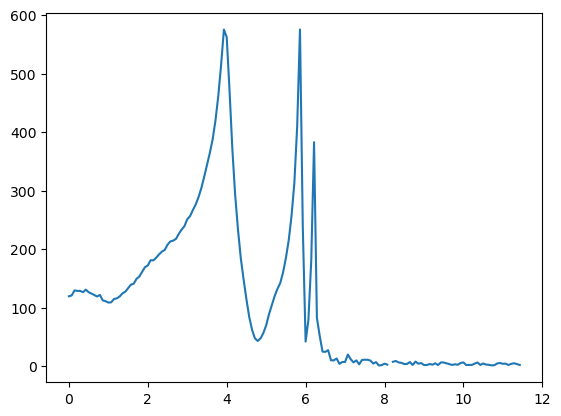

In [104]:
# Plot the orbital velocities of the galaxies 
#################################
plt.plot(MW[:,0],diff_MW_M31[:,1])

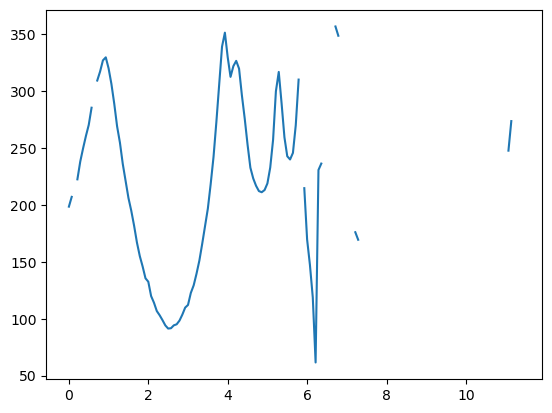

In [105]:
plt.plot(M33[:,0],diff_M31_M33[:,1])

In [ ]:
# Question 1
# You would expect 2 based on what I thought of as close encounters and not merging at the end there

In [ ]:
# Question 2
# The relative velocity is inversly related to the position

In [ ]:
# Question 3
# My graphs are screwed up, but it looks like 6.25 Gyr. I would say that the orbit doesn't drastically change in M33,
# rather the orbit just becomes smaller overtime, eventually will collapse into the new galaxy.